In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


RMSRE: 0.3520247755473456
R square: 0.614323509216219
Ljung-Box test p-values: [0.76869947]
t-test p-value: 0.03599667948622154


C:\ProgramData\Anaconda3\envs\aaa\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


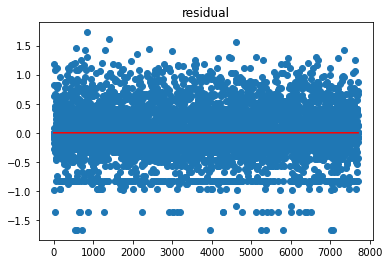

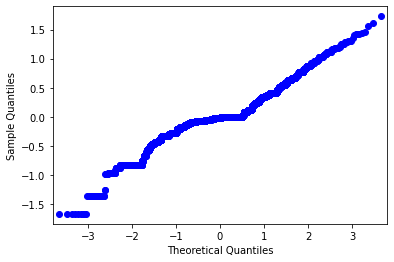

RMSRE: 0.5229604728635227
R square: 0.4458939600462063
Ljung-Box test p-values: [0.26020312]
t-test p-value: 0.22493374726243115
fail to reject the null hypothesis that the residuals are indenpendent
reject the null hypothesis that the mean of residuals are zero
Hence, the residuals are independent and have zero mean


C:\ProgramData\Anaconda3\envs\aaa\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


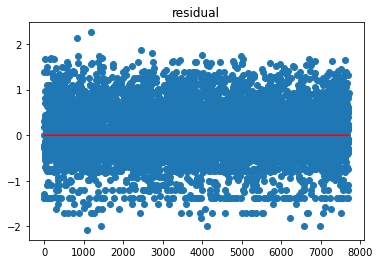

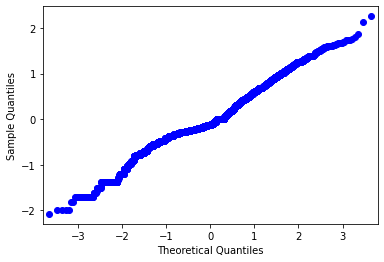

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import ttest_1samp

# Load your dataset (replace 'your_data.csv' with your actual data file)
data = pd.read_csv('dataset/merged_data_onehot.csv')
data = data.loc[:, (data != 0).any(axis=0)]
a = data.columns.to_list()
dropcolumn = ['Unnamed: 0','year_month','ILLUMINATION_8.0','DIST_NUM','LOCATION_TYPE_99','WEATHER1_98', 'WEATHER1_99','ROAD_CONDITION_98']
for i in dropcolumn:
    data = data.drop(columns = i)
# Convert categorical features to one-hot encoded dummy variables
# data = pd.get_dummies(data, drop_first=True)

# Split the dataset into features (X) and target (y)
X = data.drop('car_crash', axis=1)  # Replace 'target_column' with the name of the target column in your dataset
X = X.drop('index', axis=1)
y1 = data['car_crash']
y2 = data['index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2,random_state = 20)
# X_train = X
# y_train = np.exp(y1)-1
# y_train = y2
dt_regressor = DecisionTreeRegressor(max_features = 10,max_depth =14,random_state = 20)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)
mse = 0
n = len(y_pred)
for i in range(n):
    mse += (y_test.to_list()[i] - y_pred[i])**2/y_test.to_list()[i]**2
mse = np.sqrt(mse/n)
# mse = mean_squared_error(y_test, y_pred)
print('RMSRE:', mse)

r2 = r2_score(y_test, y_pred)
print('R square:', r2)

# Assuming your decision tree model (dt_regressor) is already trained
activated_features = set()

# Access the tree structure
tree_structure = dt_regressor.tree_
features = tree_structure.feature

# Loop through the features and add the activated ones to the set
for feature_index in features:
    if feature_index >= 0:
        feature_name = X_train.columns[feature_index]
        activated_features.add(feature_name)

importance = dt_regressor.feature_importances_

residual = np.asarray(y_test - y_pred)
plt.figure(1)
plt.scatter(range(len(residual)),residual)
plt.plot(range(len(residual)),np.zeros(len(residual)),'r')
plt.title('residual')
fig = sm.qqplot(residual)

p_values = acorr_ljungbox(residual, lags=[5], boxpierce=False)[1]

# print the p-values
print("Ljung-Box test p-values:", p_values)

t_statistic, p_value = ttest_1samp(residual, popmean=0)

# print the p-value
print("t-test p-value:", p_value)
if p_values > 0.05 and p_value > 0.05:
    print('fail to reject the null hypothesis that the residuals are indenpendent')
    print('reject the null hypothesis that the mean of residuals are zero')
    print('Hence, the residuals are independent and have zero mean')
  
features = pd.DataFrame(X.columns.to_list())
features['importance'] = importance
features = features.set_index(features.columns[0])
features = features.sort_values('importance',ascending=False)
features.to_csv('feature_importance_decision_tree_numCarCrashes.csv')

In [23]:
features

,importance
0,
WEATHER1_3,1.258027e-01
LOCATION_TYPE_0,1.070174e-01
ILLUMINATION_3.0,1.031195e-01
crime_total,1.021671e-01
ROAD_CONDITION_9,8.954935e-02
ILLUMINATION_1.0,7.736193e-02
INTERSECT_TYPE_3,6.602060e-02
INTERSECT_TYPE_2,6.168008e-02
WEATHER1_7,6.078484e-02
